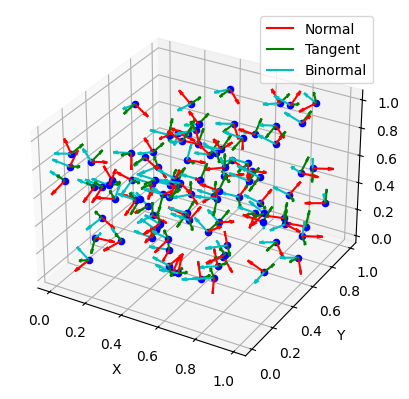

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

def compute_normal_vectors(points, k=10):
    """
    각 점에 대한 노말 벡터를 계산하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param k: 각 점에 대해 고려할 최근접 이웃의 수
    :return: 각 점의 노말 벡터, (n, 3) 배열
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(points)
    _, indices = nbrs.kneighbors(points)
    
    normal_vectors = np.zeros(points.shape)
    
    # 각 점에 대해 노말 벡터 계산
    for i, neighbors in enumerate(indices):
        if len(neighbors) > 1:
            diffs = points[neighbors[1:]] - points[i]
            pca = PCA(n_components=3)
            pca.fit(diffs)
            normal = pca.components_[-1]
            normal_vectors[i] = normal

    return normal_vectors

def compute_tangent_and_binormal_vectors(points, normal_vectors):
    """
    각 점에 대한 탄젠트 벡터와 바이노멀 벡터를 계산하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param normal_vectors: 각 점의 노말 벡터, (n, 3) 배열
    :return: 각 점의 탄젠트 벡터와 바이노멀 벡터, (n, 3) 배열
    """
    tangent_vectors = np.zeros(points.shape)
    binormal_vectors = np.zeros(points.shape)
    
    # 각 점에 대해 탄젠트 벡터 및 바이노멀 벡터 계산
    for i, normal in enumerate(normal_vectors):
        # 임의의 벡터 생성 (노말 벡터와 같은 방향이 아닐 확률이 높은 벡터)
        arbitrary_vector = np.array([1, 0, 0]) if normal[1] != 0 or normal[2] != 0 else np.array([0, 1, 0])
        tangent = np.cross(normal, arbitrary_vector)
        tangent /= np.linalg.norm(tangent)
        tangent_vectors[i] = tangent

        # 노말 벡터와 탄젠트 벡터의 외적으로 바이노멀 벡터 계산
        binormal = np.cross(normal, tangent)
        binormal /= np.linalg.norm(binormal)
        binormal_vectors[i] = binormal

    return tangent_vectors, binormal_vectors

def plot_vectors(points, normal_vectors, tangent_vectors, binormal_vectors, sample_rate=0.05):
    """
    각 점의 노말 벡터, 탄젠트 벡터, 바이노멀 벡터를 시각화하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param normal_vectors: 각 점의 노말 벡터, (n, 3) 배열
    :param tangent_vectors: 각 점의 탄젠트 벡터, (n, 3) 배열
    :param binormal_vectors: 각 점의 바이노멀 벡터, (n, 3) 배열
    :param sample_rate: 시각화할 점들의 비율
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 샘플링하여 시각화
    n_samples = int(len(points) * sample_rate)
    sample_indices = np.random.choice(len(points), n_samples, replace=False)
    
    for i in sample_indices:
        point = points[i]
        normal = normal_vectors[i]
        tangent = tangent_vectors[i]
        binormal = binormal_vectors[i]
        ax.scatter(*point, color='b')  # 점 표시
        ax.quiver(*point, *normal, color='r', length=0.1, normalize=True, label='Normal' if i == sample_indices[0] else "")
        ax.quiver(*point, *tangent, color='g', length=0.1, normalize=True, label='Tangent' if i == sample_indices[0] else "")
        ax.quiver(*point, *binormal, color='c', length=0.1, normalize=True, label='Binormal' if i == sample_indices[0] else "")

    # 그래프 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

# 예제 데이터 생성
np.random.seed(0)
points = np.random.rand(100, 3)  # 100개의 무작위 3D 점

# 노말 벡터 및 탄젠트 벡터, 바이노멀 벡터 계산
normal_vectors = compute_normal_vectors(points, k=10)
tangent_vectors, binormal_vectors = compute_tangent_and_binormal_vectors(points, normal_vectors)

# 벡터 시각화
plot_vectors(points, normal_vectors, tangent_vectors, binormal_vectors, sample_rate=1)

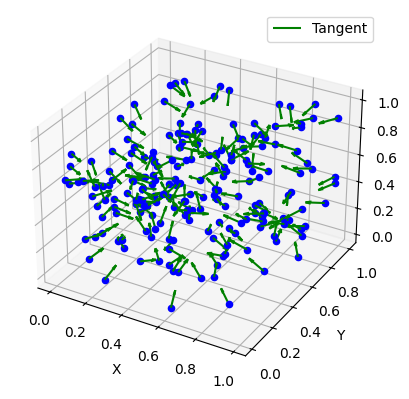

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

def compute_tangent_vectors(points, k=10):
    """
    각 점에 대해 탄젠트 벡터를 계산하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param k: 각 점에 대해 고려할 최근접 이웃의 수
    :return: 각 점의 탄젠트 벡터, (n, 3) 배열
    """
    nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(points)
    _, indices = nbrs.kneighbors(points)
    
    tangent_vectors = np.zeros(points.shape)
    
    # 각 점에 대해 탄젠트 벡터 계산
    for i, neighbors in enumerate(indices):
        if len(neighbors) > 1:
            # 인접 점들과의 차분 벡터 계산
            diffs = points[neighbors[1:]] - points[i]
            # 평균 차분 벡터 계산
            mean_diff = np.mean(diffs, axis=0)
            # 정규화하여 탄젠트 벡터 계산
            tangent = mean_diff / np.linalg.norm(mean_diff)
            tangent_vectors[i] = tangent

    return tangent_vectors

def plot_tangent_vectors(points, tangent_vectors, sample_rate=0.1):
    """
    각 점의 탄젠트 벡터를 시각화하는 함수.
    
    :param points: 점들의 좌표, (n, 3) 배열
    :param tangent_vectors: 각 점의 탄젠트 벡터, (n, 3) 배열
    :param sample_rate: 시각화할 점들의 비율
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 샘플링하여 시각화
    n_samples = int(len(points) * sample_rate)
    sample_indices = np.random.choice(len(points), n_samples, replace=False)
    
    for i in sample_indices:
        point = points[i]
        tangent = tangent_vectors[i]
        ax.scatter(*point, color='b')  # 점 표시
        ax.quiver(*point, *tangent, color='g', length=0.1, normalize=True, label='Tangent' if i == sample_indices[0] else "")

    # 그래프 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    plt.legend()
    plt.show()

# # 예제 데이터 생성
np.random.seed(0)
points = np.random.rand(200, 3)  # 100개의 무작위 3D 점

# 탄젠트 벡터 계산
tangent_vectors = compute_tangent_vectors(points, k=10)

# 탄젠트 벡터 시각화
plot_tangent_vectors(points, tangent_vectors, sample_rate=1)
